# **Project Name**    -  **Bike Sharing Demand Prediction**



##### **Project Type**    - Regression

##### **Contribution**    - Individual


# **GitHub Link -**

https://github.com/AkshayS15/Bike_Sharing_Demand_Prediction/blob/main/Capstone_Regression_Project_Bike_Sharing_Demand_Prediction_.ipynb

# **Problem Statement**
#### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
#let's import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Projects/Regression Project/SeoulBikeData.csv', encoding = 'latin')

### Dataset First View

In [ ]:
# Viewing the data of top 5 rows to take a glimps of the data
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [ ]:
#Getting the shape of dataset with rows and columns
df.shape

(8760, 14)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

**Why is it important to remove duplicate records from my data?** 
* "Duplication" just means that you have repeated data in your dataset. This could be due to things like data entry errors or data collection methods. by removing duplication in our data set,  Time and money are saved by not sending identical communications multiple times to the same person.***

In [ ]:
# Dataset Duplicate Value Count
dupliates = len(df[df.duplicated()])
print("There are {} duplicate values in dataset".format(dupliates))

There are 0 duplicate values in dataset


* ***In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.***

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


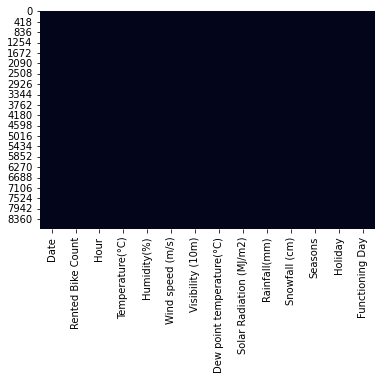

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

* ***As we can see above there are no missing value presents thankfully***

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

#### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


#### <b>Attribute Information: </b>

* ##### Date : year-month-day
* ##### Rented Bike count - Count of bikes rented at each hour
* ##### Hour - Hour of he day
* ##### Temperature-Temperature of the day
* ##### Humidity - Humidity Measure
* ##### Windspeed - windspeed
* ##### Visibility - Visibility Measure
* ##### Dew point temperature - Dew Point Temprature Measure
* ##### Solar radiation - Solar Radition Measure
* ##### Rainfall - Rainfall in mm
* ##### Snowfall - Snowfall in cm
* ##### Seasons - Season Name (Winter, Spring, Summer, Autumn)
* ##### Holiday - Holiday or No holiday
* ##### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in ",i,"is",df[i].nunique(),".")

No. of unique values in  Date is 365 .
No. of unique values in  Rented Bike Count is 2166 .
No. of unique values in  Hour is 24 .
No. of unique values in  Temperature(°C) is 546 .
No. of unique values in  Humidity(%) is 90 .
No. of unique values in  Wind speed (m/s) is 65 .
No. of unique values in  Visibility (10m) is 1789 .
No. of unique values in  Dew point temperature(°C) is 556 .
No. of unique values in  Solar Radiation (MJ/m2) is 345 .
No. of unique values in  Rainfall(mm) is 61 .
No. of unique values in  Snowfall (cm) is 51 .
No. of unique values in  Seasons is 4 .
No. of unique values in  Holiday is 2 .
No. of unique values in  Functioning Day is 2 .


## 3. ***Data Wrangling***

### Data Wrangling Code

####Changing column name

In [ ]:
df = df.rename(columns = {'Rented Bike Count': 'Rented_Bike_Count',
                          'Temperature(°C)':'Temperature',
                          'Humidity(%)' : 'Humidity',
                          'Wind speed (m/s)' : 'Wind_speed',
                          'Visibility (10m)' : 'Visibility',
                          'Dew point temperature(°C)' : 'Dew_point_temperature',
                          'Solar Radiation (MJ/m2)': 'Solar_Radiation',
                          'Rainfall(mm)' : 'Rainfall', 
                          'Snowfall (cm)' : 'Snowfall',
                          'Functioning Day' : 'Functioning_Day'})

- **Here, Python read 'Date' column as object type i.e. it's considering it as string. As "Date" column is very important for us to kmow the behaviour of the customers, we will convert it to datetime format and further we will break it into Day, Month and Year**

In [ ]:
# Breaking the "Date" column into three "year","month","day" column
df['Date'] = df['Date'].apply(lambda x : dt.datetime.strptime(x,'%d/%m/%Y'))

In [ ]:
df['Day'] = df['Date'].dt.day_name()
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
# Creating new column "Weekday_Weekends" and then we will drop "Date", "Day" and "Year" columns 

df["Weekday_Weekends"] = df['Day'].apply(lambda x : 0 if x == 'Sunday' or x == 'Saturday' else 1)
df = df.drop(columns = ['Date','Day','Year'],axis =1)

- **The Year column consists only 2 values 2017 and 2018, so if we consider it as 1 year, then there is no need to keep that column so we droppped it.** 
- **The day consists day names of each month which is not much relevant for our prediction. So we droppped that too.**

In [ ]:
df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,Weekday_Weekends
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,1


In [ ]:
df['Weekday_Weekends'].value_counts()

1    6264
0    2496
Name: Weekday_Weekends, dtype: int64

##Changing data type

* **As "Hour","month","weekdays_weekend" column are show as a integer data type but actually it is a category data tyepe. so we need to change this data tyepe if we not then, while doing the further anlysis and correleted with this then the values are not actually true so we can mislead by this.**

In [ ]:
#Change the int64 column into catagory column
cols=['Hour','Month','Weekday_Weekends']
for col in cols:
  df[col]=df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  Weekday_Weekends       8760 non-null   c

## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

Text(0.5, 1.0, 'Count of rented bikes in each month')

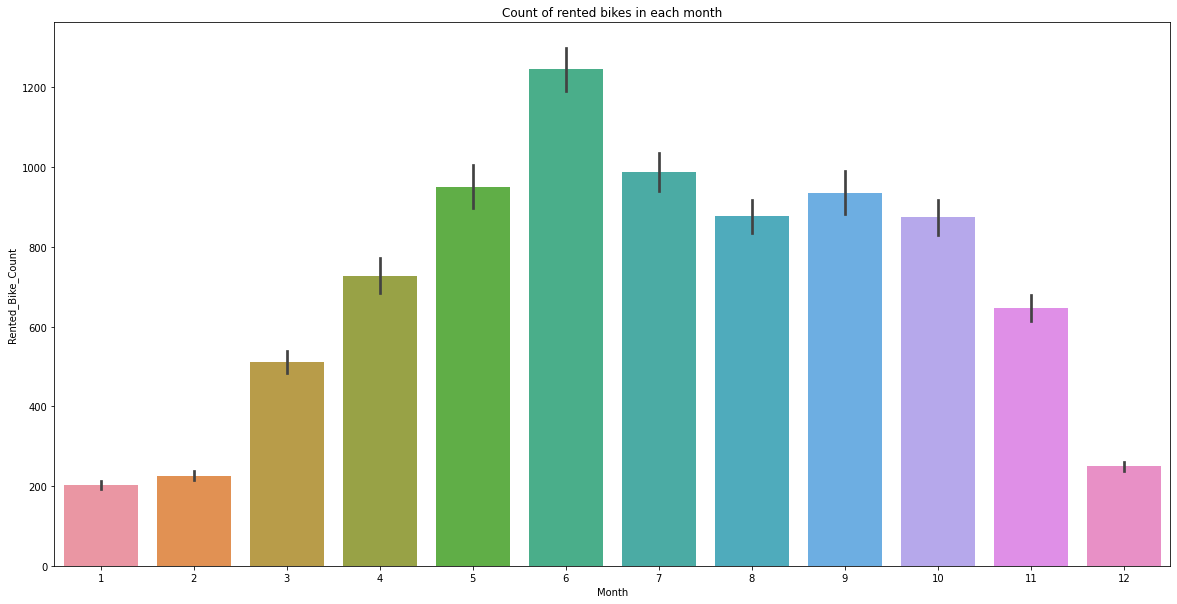

In [ ]:
#Bike rent counts in each month
fig = plt.subplots(figsize = (20,10))
sns.barplot(data = df , x = 'Month', y = 'Rented_Bike_Count')
plt.title('Count of rented bikes in each month')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

- **From the above plot, we can see that the demand for the bikes is higher from the 5th to the 10th month as compared to other months. These months are classified as summer.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of rented bikes on Weekends and Weekdays')

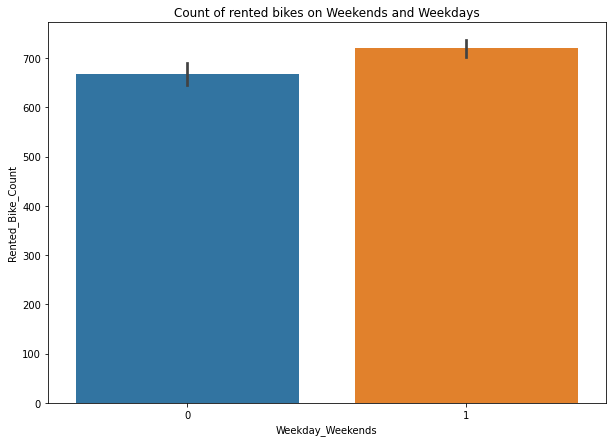

In [ ]:
#Counts on weekdays and weekends
fig = plt.subplots(figsize = (10,7))
sns.barplot(data = df , x = 'Weekday_Weekends', y = 'Rented_Bike_Count')
plt.title('Count of rented bikes on Weekends and Weekdays')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

- **Here, we can clearly see that the distribution of demand is quite similar on both weekends and weekdays. But on weekdays, the demand is slightly higher.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to hour')

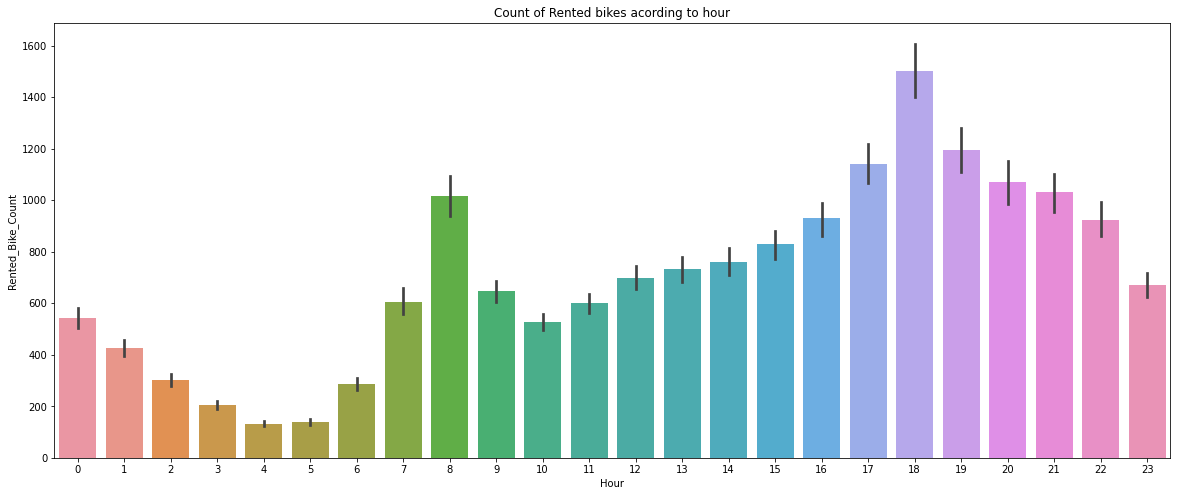

In [ ]:
#Counts in each hour
fig = plt.subplots(figsize = (20,8))
sns.barplot(data = df, x = 'Hour' , y = 'Rented_Bike_Count' )
plt.title('Count of Rented bikes acording to hour')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

- **According to the above point plot and bar plot, the demand for the bike is higher on weekdays, which are represented in blue, due to the office.**
- **Peak times are from 7 am to 9 am and from 5 pm to 7 pm.**
- **The blue colour represents the weekend days, and it shows that the demand for rented bikes is very low, especially in the morning hours, but when the evening hours start from 4 p.m. to 8 p.m., the demand slightly increases.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to Functioning Day')

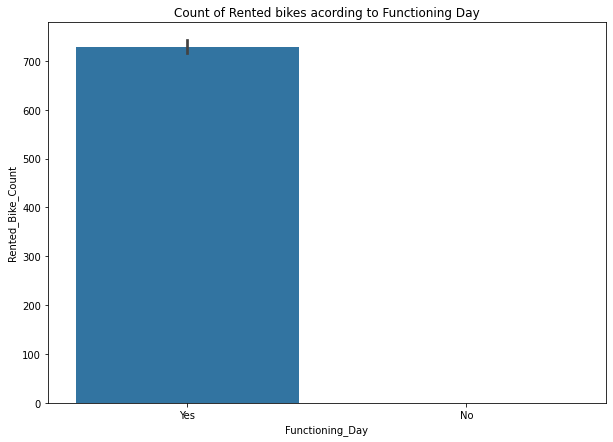

In [ ]:
#Counts on functioning and non-functioning days
fig = plt.subplots(figsize = (10,7))
sns.barplot(data = df, x = 'Functioning_Day' , y = 'Rented_Bike_Count' )
plt.title('Count of Rented bikes acording to Functioning Day')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

* **The above bar and point plot clearly shows whether or not a rented bike was used during a working day.**
* **On non-working days, people do not use reclaimed bikes.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons')

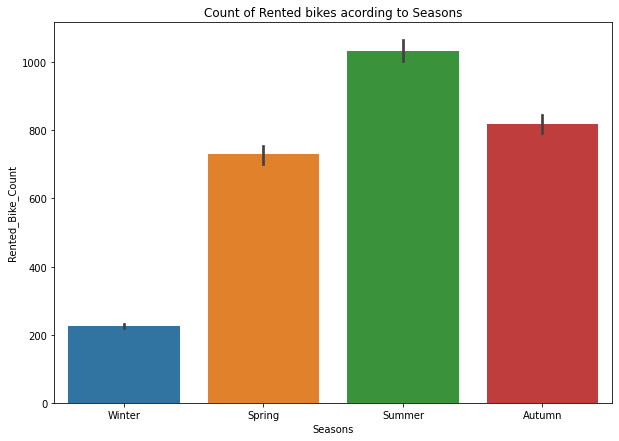

In [ ]:
#Counts in Each seasons
fig = plt.subplots(figsize = (10,7))
sns.barplot(data = df, x = 'Seasons' , y = 'Rented_Bike_Count' )
plt.title('Count of Rented bikes acording to Seasons')

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

- **In the winter season, the use of rented bikes is very low because of snowfall.**

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to Hour ')

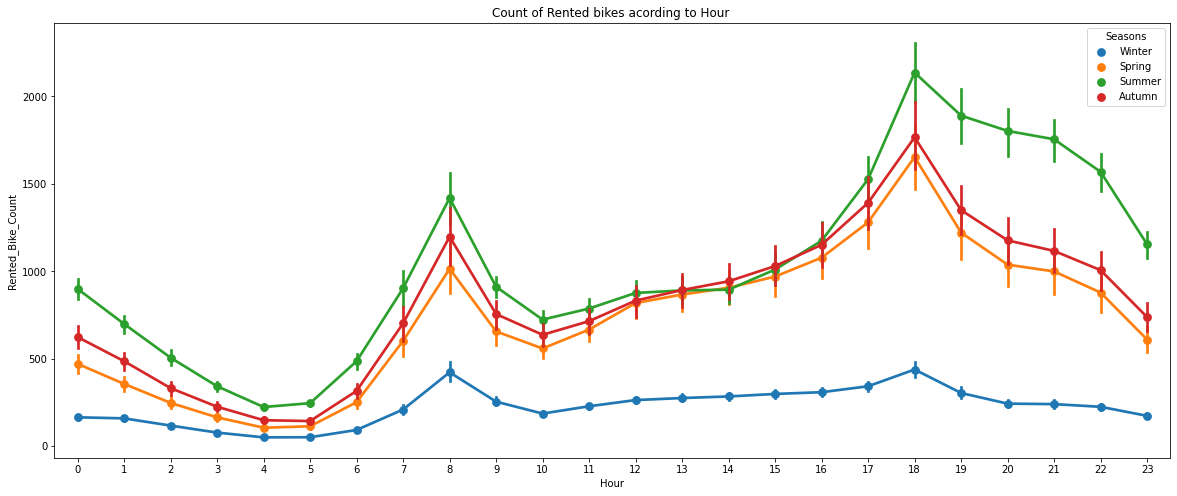

In [ ]:
#Counts trend in each hour dring each season
fig=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Seasons')
plt.title('Count of Rented bikes acording to Hour ')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

- **The above bar and point plot, which depicts the use of a rented bike during four different seasons, clearly demonstrates that, During the summer, the most popular times to rent a bike are 7 a.m.-9 a.m. and 7 p.m.-5 p.m.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')

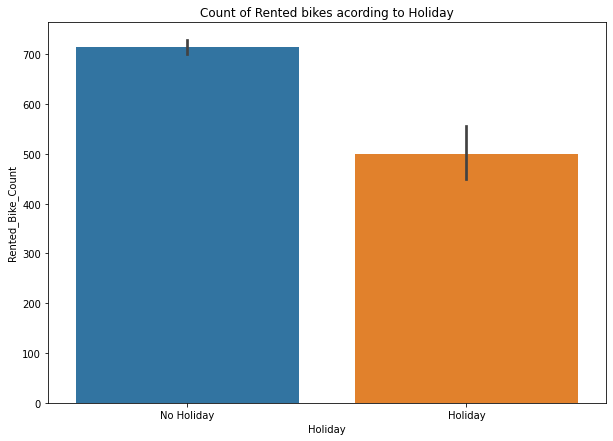

In [ ]:
#Counts on holidays and non-holidays
fig = plt.subplots(figsize = (10,7))
sns.barplot(data = df, x = 'Holiday' , y = 'Rented_Bike_Count' )
plt.title('Count of Rented bikes acording to Holiday')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

- **The demand for rental bikes is higher on non-holiday days compared to holidays.**
- **The demand is approximately around 700 on non-holidays and around 500 on holidays.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')

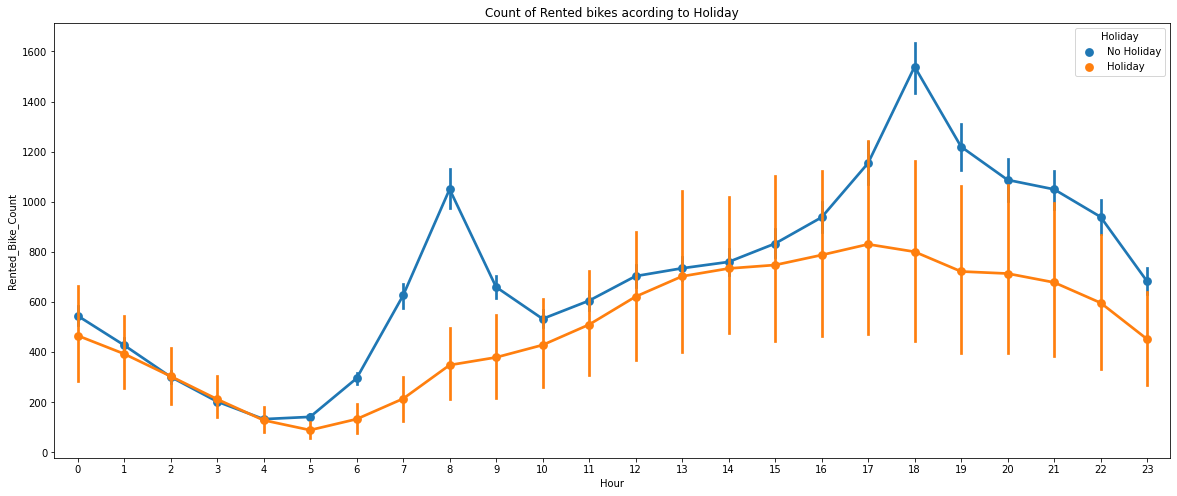

In [ ]:
#Counts trend in each hour during holidays and non-holidays
fig=plt.subplots(figsize=(20,8))
sns.pointplot(data=df,x='Hour',y='Rented_Bike_Count',hue='Holiday')
plt.title('Count of Rented bikes acording to Holiday')

##### 1. Why did you pick the specific chart?

A point plot represents an estimate of central tendency for a numeric variable by the position of the dot and provides some indication of the uncertainty around that estimate using error bars.

##### 2. What is/are the insight(s) found from the chart?

- **The plot depicts that during the holidays, people use the rented bike from 2 p.m. to 8 p.m.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

###**Analyze of Numerical variables**

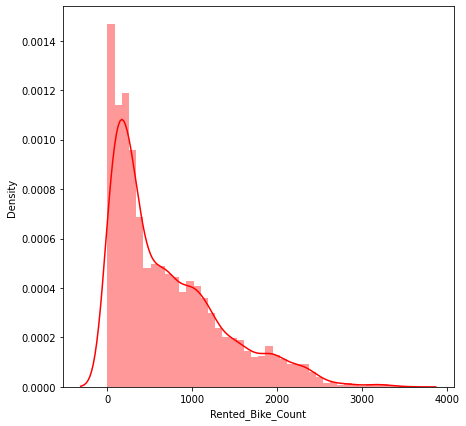

In [ ]:
#Distribution of rent counts
plt.figure(figsize = (7,7))
sns.distplot(df['Rented_Bike_Count'],color = 'r')

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall'],
      dtype='object')

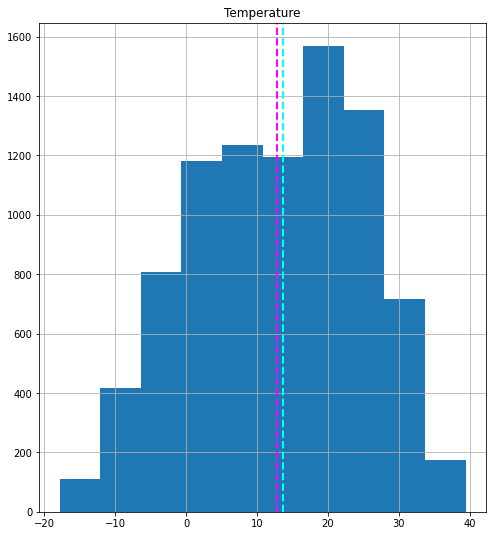

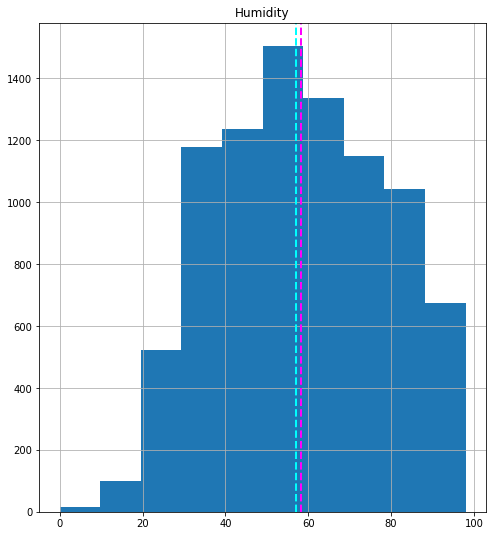

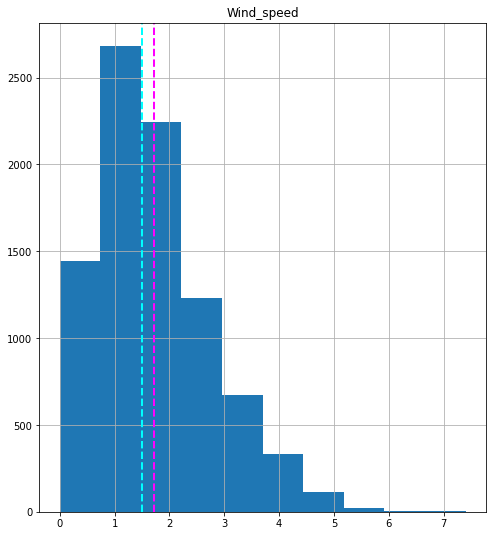

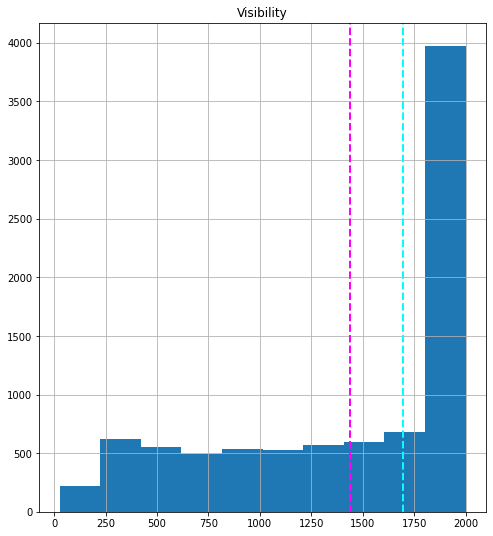

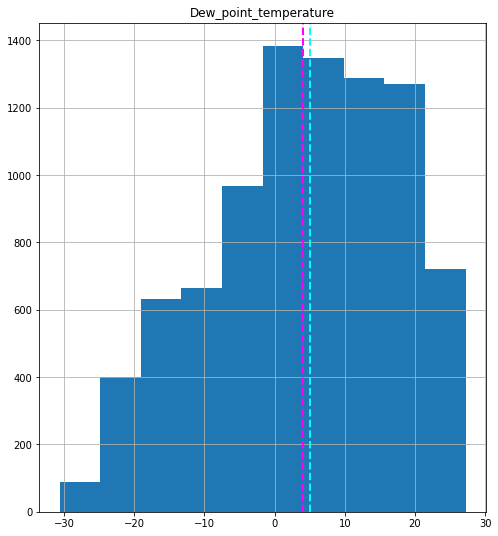

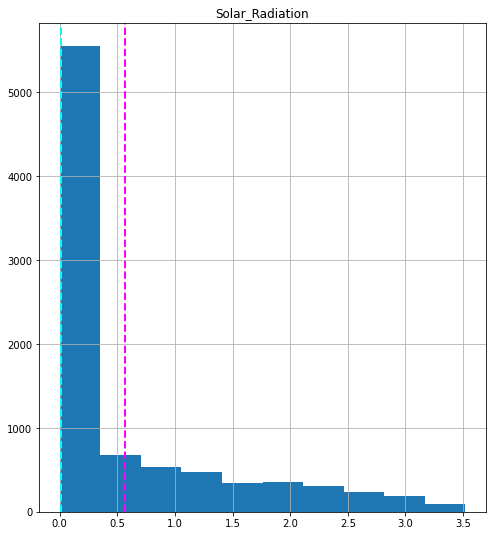

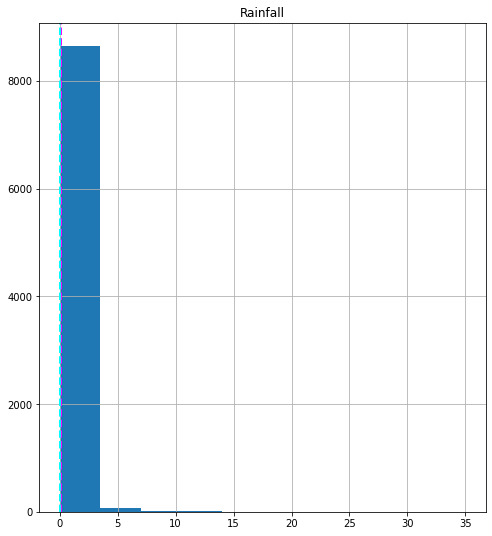

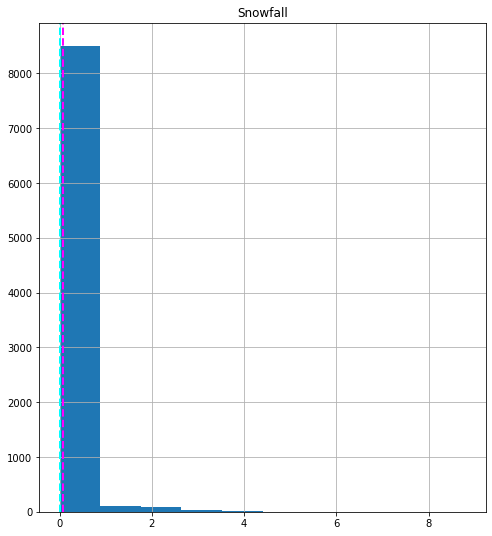

In [ ]:
#Distribution of each numerical features
for col in numeric_features [1:] :
  fig = plt.figure(figsize = (8,9))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins = 10, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

- **A histogram is an excellent tool for visualizing and understanding the probabilistic distribution of numerical data or image data that is intuitively understood by almost everyone. Python has a lot of different options for building and plotting histograms.**


##### 2. What is/are the insight(s) found from the chart?

- **Here, we can see that, Temprature and humidity distribution is closed to normal or Gaussian Distribution.** 
- **Also, Wind Speed, Solar radiation, Rainfall and Snowfall is left skewed**
- **Whereas, Dew Point Temprature and Visibility are right skewed.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

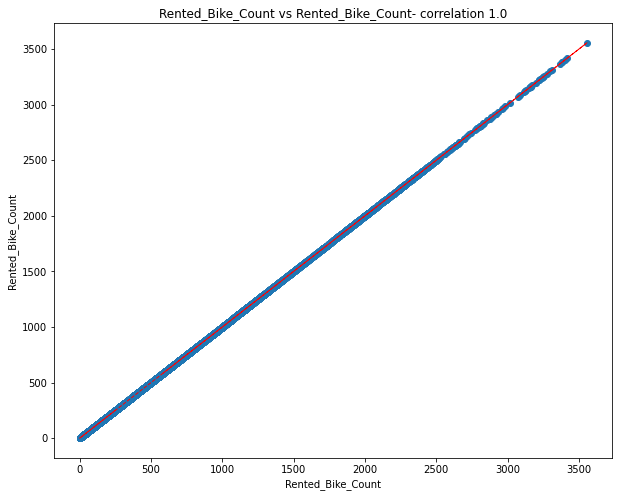

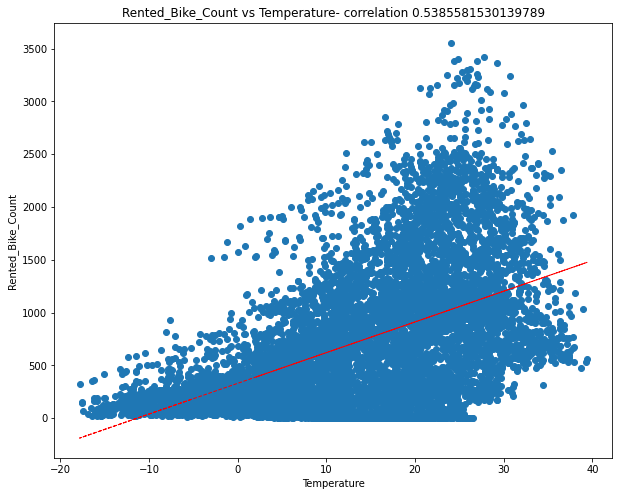

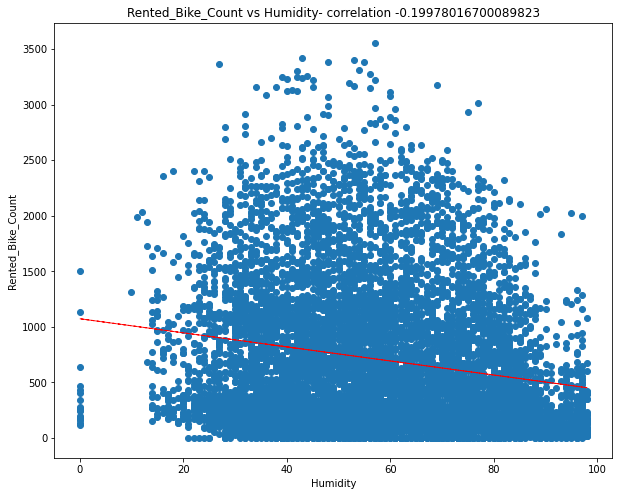

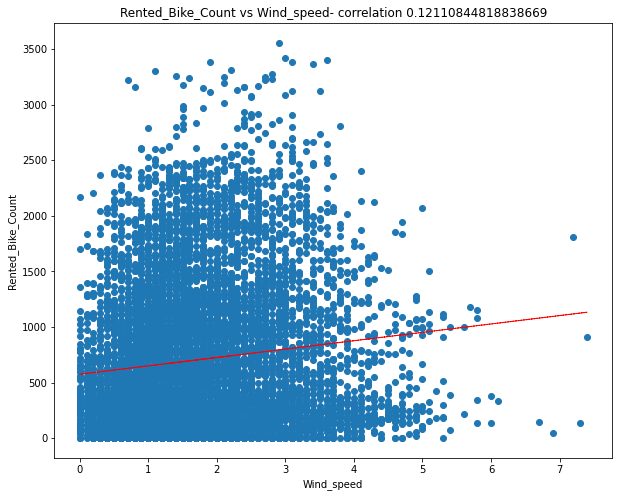

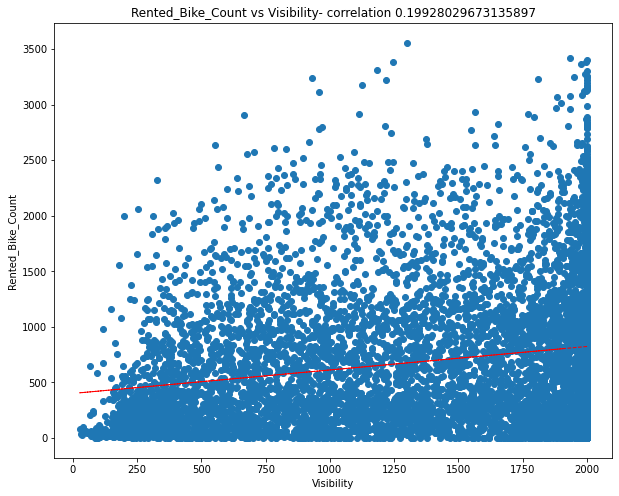

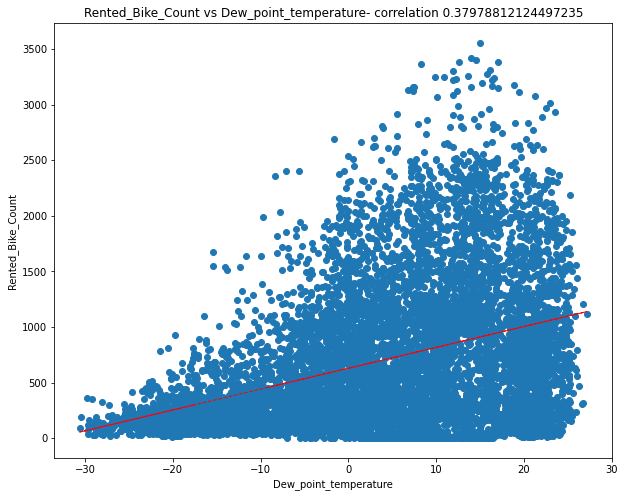

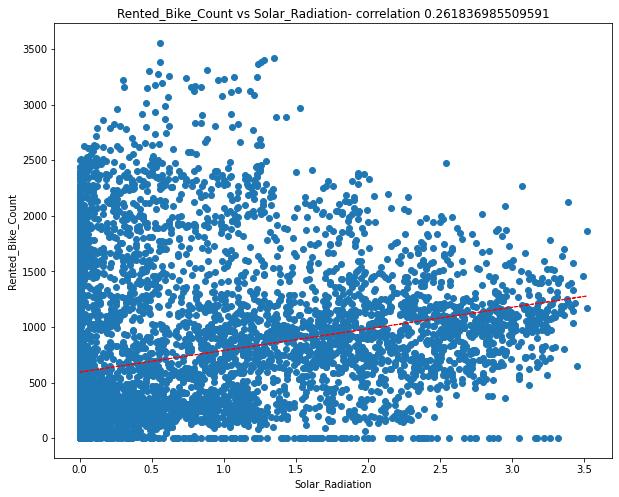

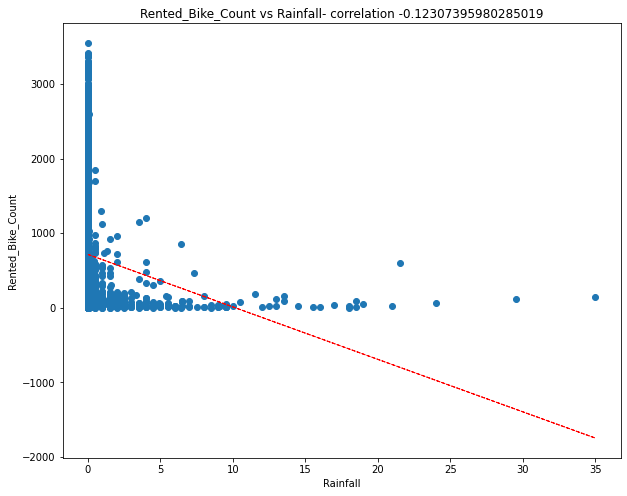

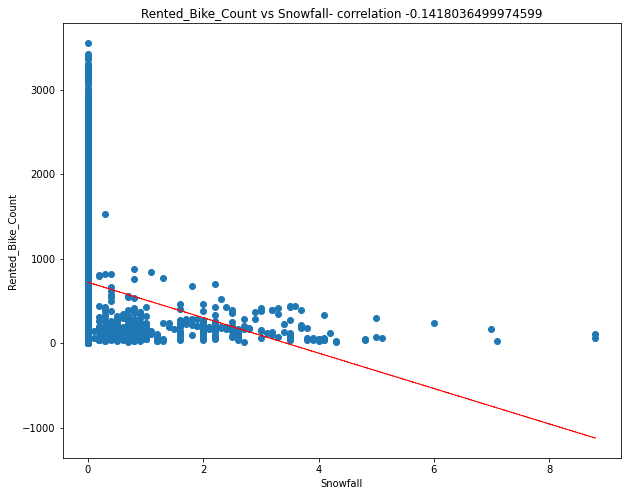

In [ ]:
#Realtionship between output feature and all other dependent numerical features
for col in numeric_features :
  fig = plt.figure(figsize = (10,8))
  ax = fig.gca()
  feature = df[col]
  label = df['Rented_Bike_Count']
  corre = feature.corr(label)
  plt.scatter(x = feature, y = label)
  plt.xlabel(col)
  plt.ylabel('Rented_Bike_Count')
  ax.set_title('Rented_Bike_Count vs '+ col + '- correlation ' + str(corre))
  z = np.polyfit(df[col], df['Rented_Bike_Count'],1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1)
plt.show()

##### 1. Why did you pick the specific chart?

- **The regression plots are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses. Regression plots as the name suggests creates a regression line between 2 parameters and helps to visualize their linear relationships.**


##### 2. What is/are the insight(s) found from the chart?

* **From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.**


* **which means the rented bike count increases with increase of these features.**
* **'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.**


##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

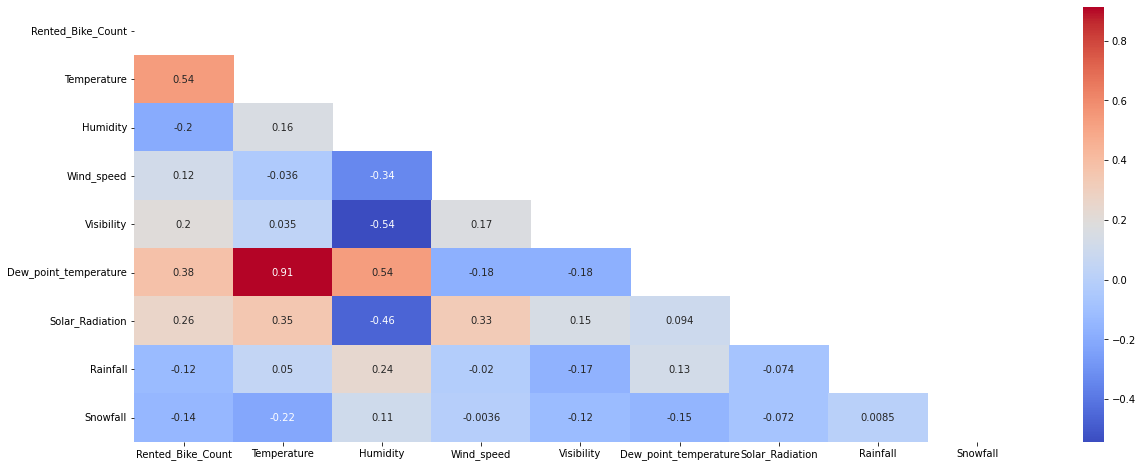

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(20,8))
correlation=df.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
sns.heatmap((correlation),mask=mask, annot=True,cmap='coolwarm')

##### 1. Why did you pick the specific chart?

- **Heat Maps are graphical representations of data that utilize color-coded systems. The primary purpose of Heat Maps is to better visualize the volume of locations/events within a dataset and assist in directing viewers towards areas on data visualizations that matter most.**


##### 2. What is/are the insight(s) found from the chart?

***We can observe on the heatmap that on the target variable line the most positively correlated variables to the rent are :***

* the temperature
* the dew point temperature
* the solar radiation

***And most negatively correlated variables are:***
* Humidity
* Rainfall





* ***From the above correlation heatmap, We see that there is a positive 
correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis. And they have the same variations.. so we can drop the column 'Dew point temperature(°C)'.***

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

## ***4. Feature Engineering & Data Pre-processing***

### 1. Handling Outliers

In [ ]:
df=df.drop(['Dew_point_temperature'],axis=1)

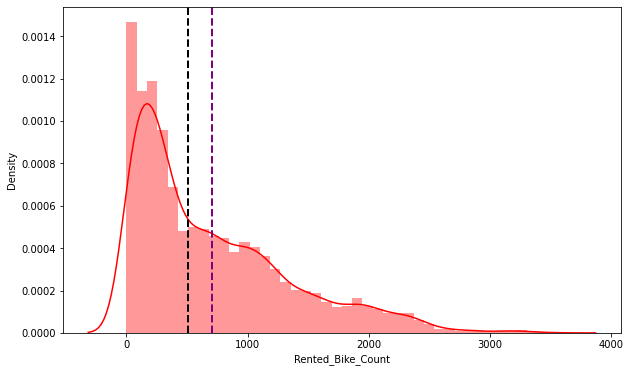

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented_Bike_Count'],hist=True ,color="r")
ax.axvline(df['Rented_Bike_Count'].mean(), color='purple', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

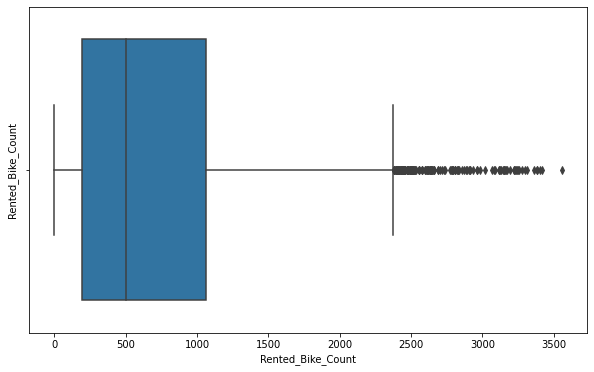

In [ ]:
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=df['Rented_Bike_Count'])
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

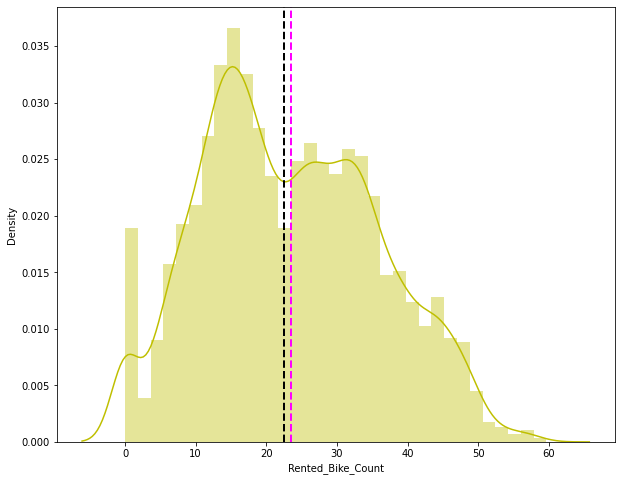

In [ ]:
#Applying squareroot formation on Rented_Bike_Count column
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

* ***Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.***

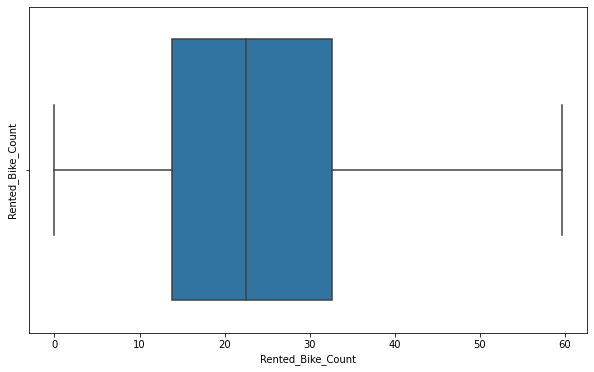

In [ ]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers 
plt.figure(figsize=(10,6))

plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(df['Rented_Bike_Count']))
plt.show()

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

### 2. Categorical Encoding

In [ ]:
categorical_features=list(df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'Weekday_Weekends'],
      dtype='object')

###one hot encoding

In [ ]:
df_copy = df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    df_copy = one_hot_encoding(df_copy, col)
df_copy.head()  

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekday_Weekends_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,1


### 3. Data Splitting

In [ ]:
X = df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(df_copy['Rented_Bike_Count'])

In [ ]:
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,Weekday_Weekends_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,1
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [ ]:
df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'Weekday_Weekends_1'],
      dtype='object')

## ***5. ML Model Implementation***

### Linear Regression 

In [ ]:
reg= LinearRegression().fit(X_train, y_train)
reg.score(X_train,y_train)

0.7722101548255267

In [ ]:
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00,  1.42458875e+00])

In [ ]:
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07751288189292
RMSE : 5.9226271942350825
MAE : 4.474024092996788
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


**Looks like our r2 score value is 0.77 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [ ]:
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)

#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318182
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

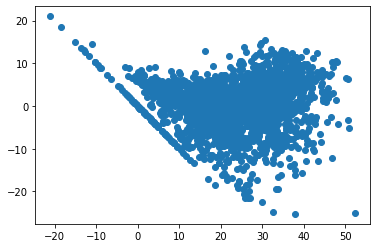

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

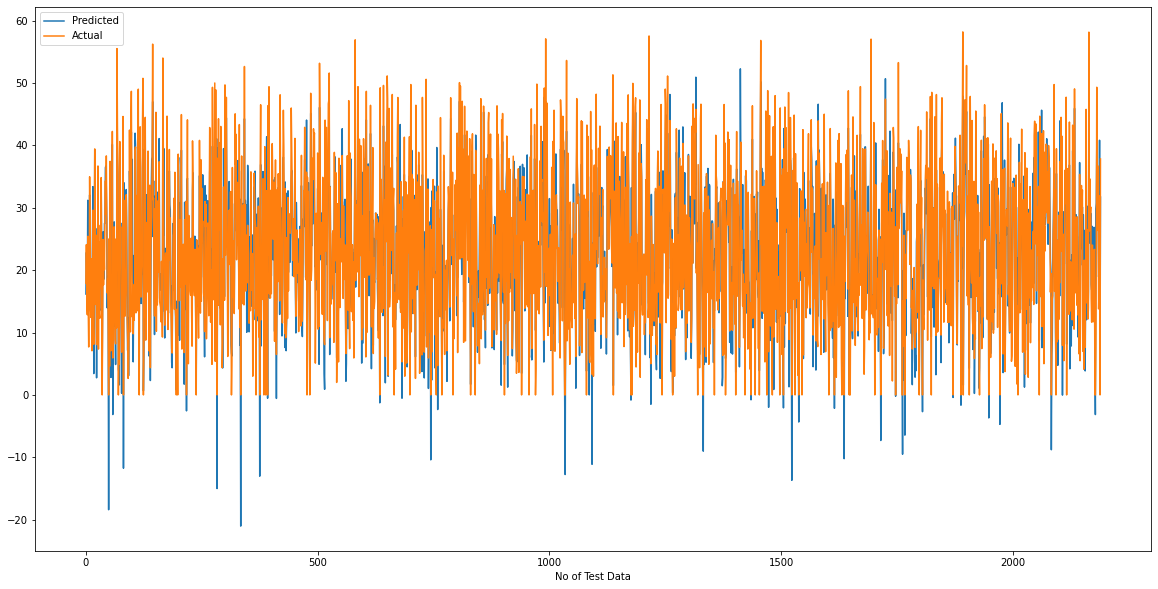

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

### Lasso Regression 

In [ ]:
lasso = Lasso(alpha = 1.0 , max_iter = 5000)
#Let's fit the lasso model
lasso.fit(X_train,y_train)
# FIinding out scores 
print(lasso.score(X_train,y_train), lasso.score(X_test,y_test))

0.40519624904934015 0.3873692800799008


In [ ]:
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


**Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


**The r2_score for the test set is 0.38. This means our linear model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

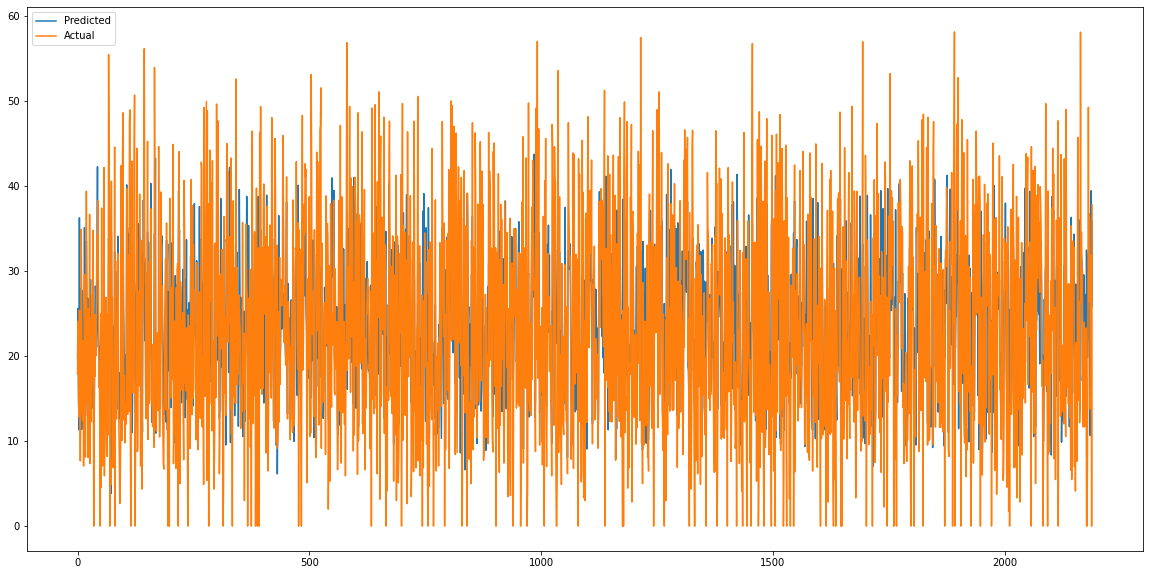

In [ ]:
#Plot the figure
plt.figure(figsize=(20,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

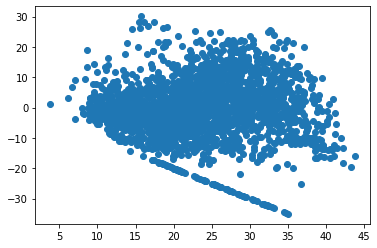

In [ ]:
### Heteroscadacity

plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -35.664708570175584


In [ ]:
y_pred_lasso1 = lasso_regressor.predict(X_train)
y_pred_lasso2 = lasso_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_lasso1))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_lasso1)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_lasso1)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_lasso1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_lasso1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 35.07868077441708
RMSE : 5.922725789230587
MAE : 4.474041218018374
R2 : 0.7722025706487878
Adjusted R2 : 0.7672042143558341


**After Hyperparameter Tuning, we can see the value of r2 score for train data is coming as 0.77 which is very good as compared to the model without hyperparameter tuning and cross validation.**

In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_lasso2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_lasso2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_lasso2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_lasso2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_lasso2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.27578088545121
RMSE : 5.76851635045366
MAE : 4.410371317729226
R2 : 0.7893489996555294
Adjusted R2 : 0.7847268721969907


**The value of r2 score for test data is also showing good improvement after the application of hyperparameter tuning and hence we can say it's a good score and good model.**

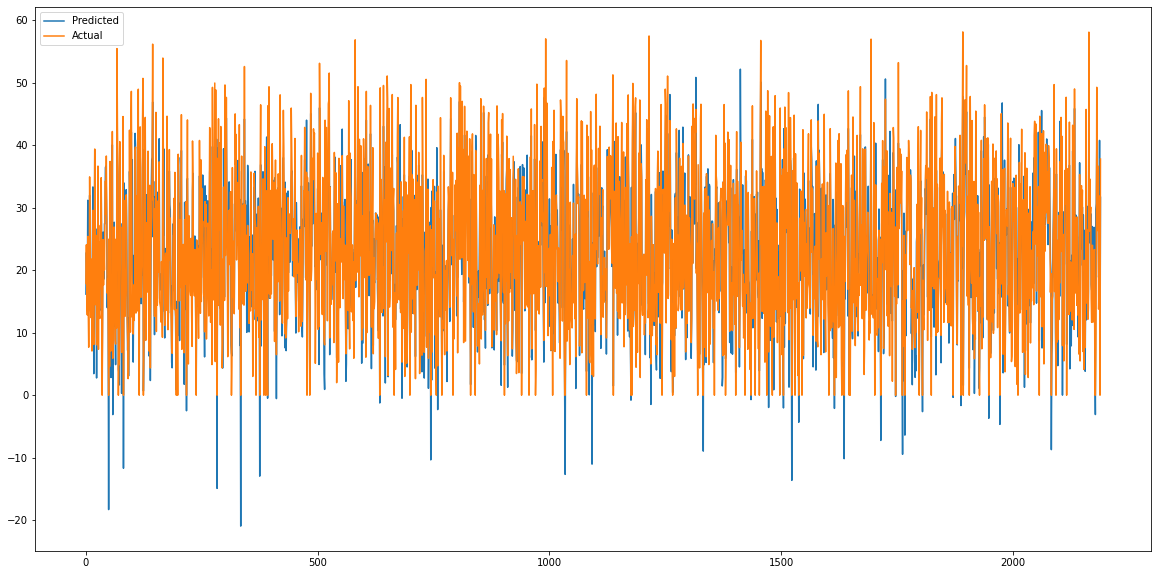

In [ ]:
#Take a look at plot
plt.figure(figsize=(20,10))
plt.plot(np.array(y_pred_lasso2))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

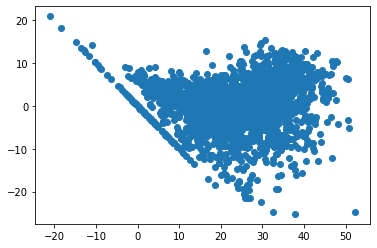

In [ ]:
#heteroscedacity 
plt.scatter((y_pred_lasso2),(y_test-y_pred_lasso2))

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

**Yes, there is a lot of improvement after doing hyperparameter tuning and cross validation.**

### Ridge Regression

In [ ]:
ridge= Ridge(alpha=0.1)
# Let's fit the model
ridge.fit(X_train,y_train)
#Let's find out the scores
print(ridge.score(X_train, y_train) , ridge.score(X_test, y_test))

0.7722100789802107 0.7893426477812578


In [ ]:
#Let's do the prediction
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125379
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Looks like our r2 score value is 0.77 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error(y_test, y_pred_test_ridge)
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(y_test, y_pred_test_ridge)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score((y_test), (y_pred_test_ridge))
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


**The r2_score for the test set is 0.78. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
test_df=test_df.append(dict2,ignore_index=True)

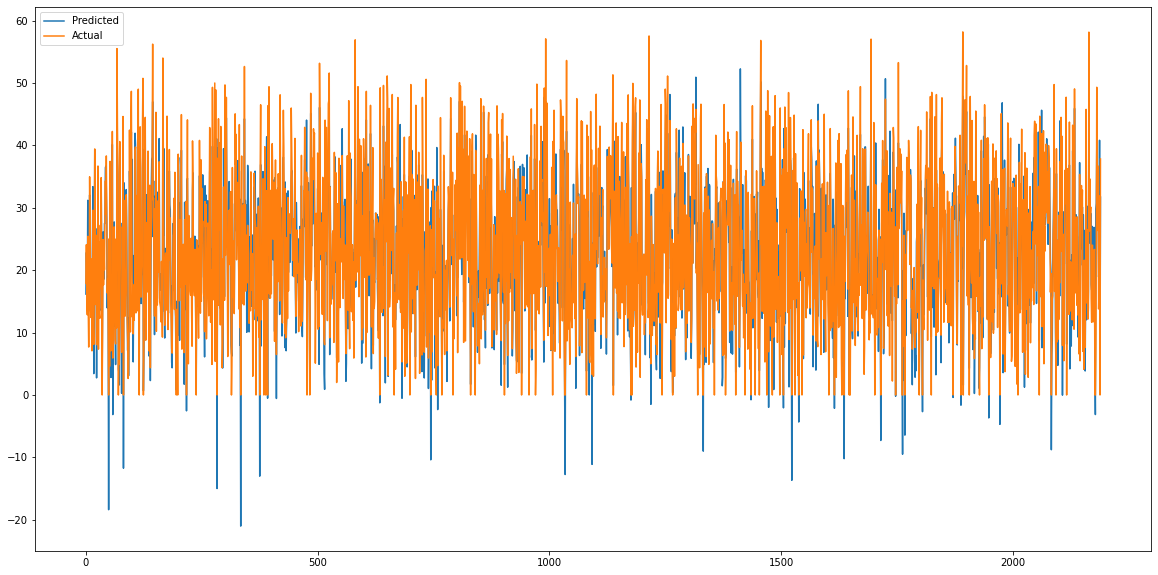

In [ ]:
#Plot the figure
plt.figure(figsize=(20,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

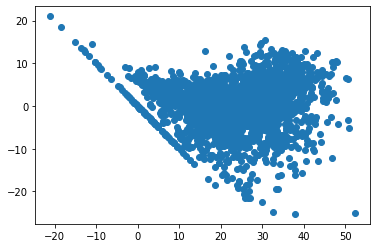

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -35.77667600903743


In [ ]:
y_pred_ridge1 = ridge_regressor.predict(X_train)
y_pred_ridge2 = ridge_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_ridge1))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_ridge1)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_ridge1)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_ridge1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_ridge1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.078667152462494
RMSE : 5.922724639257045
MAE : 4.475087120207344
R2 : 0.7722026591083926
Adjusted R2 : 0.7672043047564292


In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_ridge2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_ridge2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_ridge2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_ridge2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_ridge2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.29094193082603
RMSE : 5.76983032080026
MAE : 4.41255423365733
R2 : 0.789253023264007
Adjusted R2 : 0.784628789880911


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation in ridge regression.

### Elastic Net Regression

In [ ]:
#Fit the model
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasticnet.fit(X_train,y_train)
#Let's find out the score
print(elasticnet.score(X_train,y_train),elasticnet.score(X_test,y_test))

0.6261189054494012 0.6236465216363589


In [ ]:
y_pred_train_en = elasticnet.predict(X_train)
y_test_pred_en = elasticnet.predict(X_test)

In [ ]:
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)

#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Looks like our r2 score value is 0.62 that means our model is  able to capture most of the data variance.But it's lesser than previous algorithms. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_e= mean_squared_error(y_test, y_test_pred_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_test_pred_en)
print("MAE :",MAE_e)

#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_test_pred_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_test_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_test_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


**Here we are getting r2 score value as 0.62 for test data also. It's good value but we will perform hyperparameter tuning and will see what if we get any better results.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

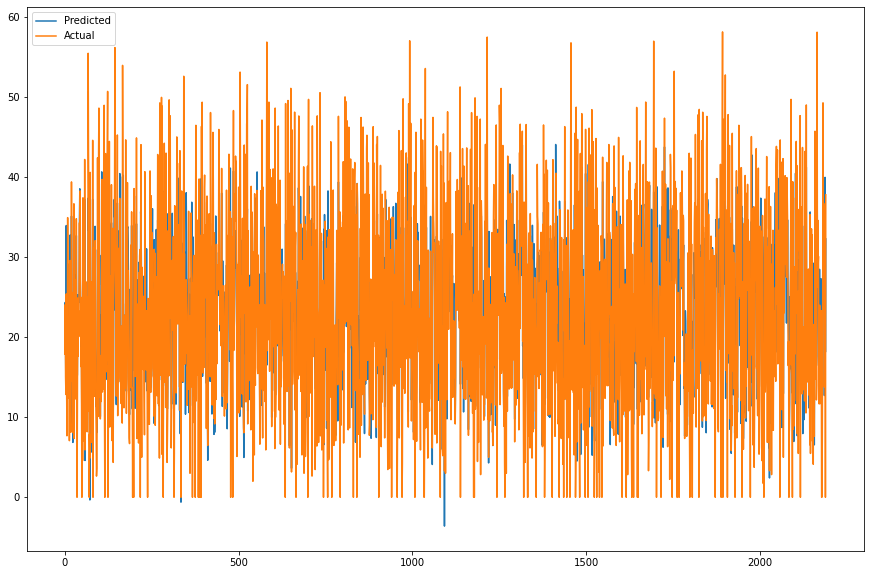

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_test_pred_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

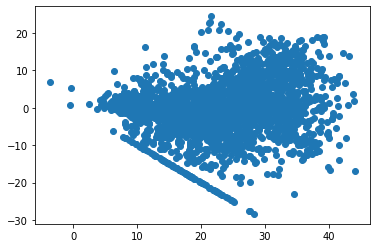

In [ ]:
### Heteroscadacity
plt.scatter((y_test_pred_en),(y_test)-(y_test_pred_en))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
elasticnet = ElasticNet()
param = {"max_iter": [1, 5, 10],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1)}
elasticnet_reg = GridSearchCV(elasticnet,param,scoring = 'neg_mean_squared_error', cv = 5)
elasticnet_reg.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [1, 5, 10]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elasticnet_reg.best_params_)
print("\nUsing ",elasticnet_reg.best_params_, " the negative mean squared error is: ", elasticnet_reg.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.6000000000000001, 'max_iter': 10}

Using  {'alpha': 0.001, 'l1_ratio': 0.6000000000000001, 'max_iter': 10}  the negative mean squared error is:  -35.82850860258283


In [ ]:
y_pred_en1 = ridge_regressor.predict(X_train)
y_pred_en2 = ridge_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_en1))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)

#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_en1)
print("MAE :",MAE_r)

#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_en1)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_en1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_en1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 35.078667152462494
RMSE : 5.922724639257045
MAE : 4.475087120207344
R2 : 0.7722026591083926
Adjusted R2 : 0.7672043047564292


In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_en2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_en2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_en2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_en2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_en2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.29094193082603
RMSE : 5.76983032080026
MAE : 4.41255423365733
R2 : 0.789253023264007
Adjusted R2 : 0.784628789880911


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there is improvement after doing hyperparameter tuning and cross validation.
r2 score for training and testig set wah 0.62 respectively but after hyperparameter tuning it is increased and now it's 0.77 and 0.78 for train and test data resp.

### **DECISION TREE**


In [ ]:
#let's Fit the model
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)
#Let's find out score
print(decision_regressor.score(X_train,y_train), decision_regressor.score(X_test,y_test))

0.6089799757486356 0.5555174486756569


In [ ]:
#get the X_train and X-test value
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)

#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 60.21343895839467
RMSE : 7.759731887017403
MAE : 6.005320716787574
R2 : 0.6089799757486356
Adjusted R2 : 0.6004001712949409


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Looks like our r2 score value is 0.608 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_d)

#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 70.21330998233447
RMSE : 8.379338278309001
MAE : 6.458056928147507
R2 : 0.5555174486756569
Adjusted R2 : 0.5457645635625644


**Here the value of r2 is quite low as 0.55, let's do the hyperparameter tuning and then see the results.**

In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

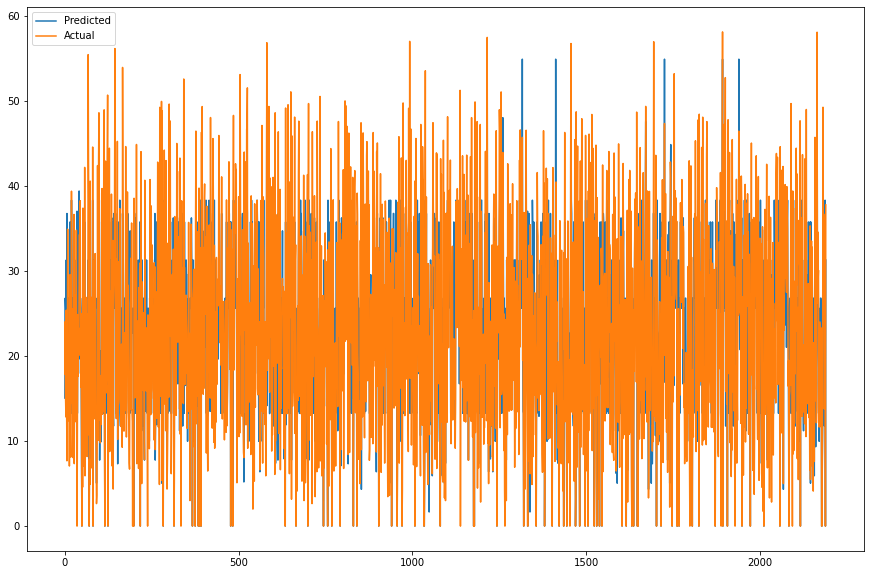

In [ ]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

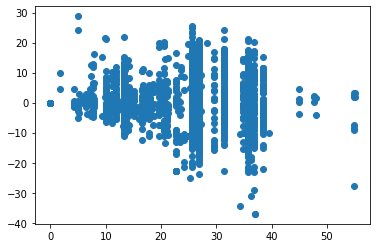

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
decision_tree = DecisionTreeRegressor()
param = {"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
dt_regressor = GridSearchCV(decision_tree, param, scoring = 'neg_mean_squared_error' , cv =5)
dt_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [ ]:
print("\nUsing ",dt_regressor.best_params_, "\n the negative mean squared error is: ", dt_regressor.best_score_)


Using  {'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': 10, 'min_samples_leaf': 6, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'} 
 the negative mean squared error is:  -93.9696227089876


In [ ]:
y_pred_dt1 = dt_regressor.predict(X_train)
y_pred_dt2 = dt_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_dt1))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_dt1)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_dt1)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_dt1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_dt1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 92.7685150368001
RMSE : 9.631641346977165
MAE : 7.275528198741004
R2 : 0.3975705818012336
Adjusted R2 : 0.3843520091330067


In [ ]:
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_dt2)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)

#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_dt2)
print("MAE :",MAE_l)

#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_dt2))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 100.70949524838092
RMSE : 10.035412061713307
MAE : 7.5439929656658515
R2 : 0.3624625672561286
Adjusted R2 : 0.3484736506646431


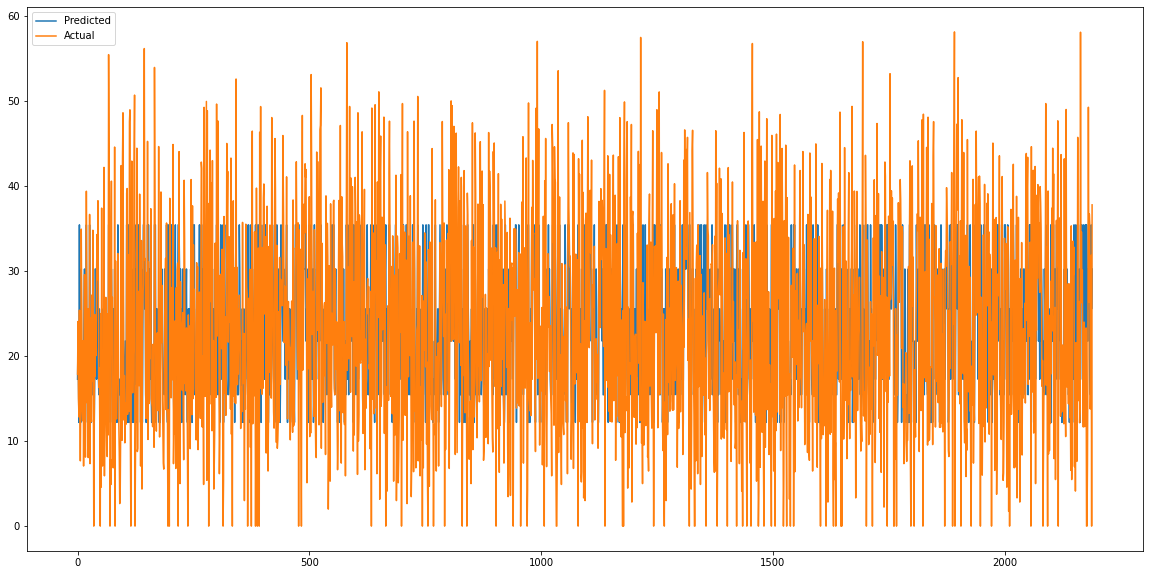

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(np.array(y_pred_dt2))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

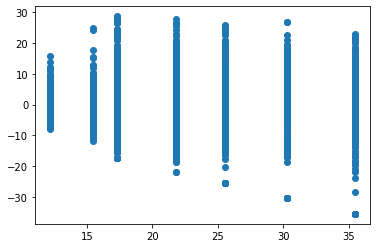

In [ ]:
#Heteroscadacity
plt.scatter((y_pred_dt2),(y_test)-(y_pred_dt2))

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

### **RANDOM FOREST**

In [ ]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)
#Let's find out the scores
print(rf_model.score(X_train,y_train) , rf_model.score(X_test,y_test))

0.9896113042202848 0.9194035618478045


In [ ]:
# Making predictions on train and test data
y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.5997623149526718
RMSE : 1.2648171073134138
MAE : 0.8097742585345732
R2 : 0.9896113042202848
Adjusted R2 : 0.9893833543128867


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

**Looks like our r2 score value is 0.98 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.731529457323436
RMSE : 3.5681268835795956
MAE : 2.204068309788145
R2 : 0.9194035618478045
Adjusted R2 : 0.9176351059219626


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




In [ ]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

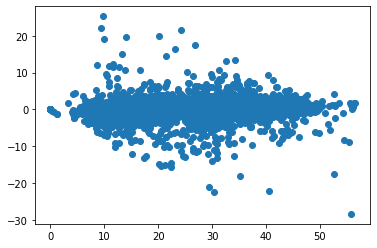

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [ ]:
rf_model.feature_importances_

array([3.16453832e-01, 1.54994729e-01, 1.17593255e-02, 1.24892618e-02,
       3.07666788e-02, 3.46608800e-02, 1.43068449e-03, 4.41782712e-03,
       1.28132905e-02, 2.04668918e-02, 2.93708966e-02, 2.44503175e-02,
       7.71692296e-03, 4.24064081e-03, 1.45226392e-02, 1.12623947e-03,
       2.26514144e-03, 1.14372663e-03, 3.03170716e-04, 2.93926072e-04,
       4.53078906e-04, 1.38744055e-03, 3.76576662e-03, 1.07194590e-02,
       3.09131875e-02, 1.74034705e-02, 1.24854343e-02, 1.31304697e-02,
       1.05463064e-02, 4.16642253e-03, 3.80916134e-03, 8.74976971e-04,
       7.29892445e-03, 3.92158698e-03, 1.51992472e-01, 2.97100077e-04,
       3.96484040e-03, 1.14174720e-03, 1.42969539e-03, 2.38464057e-03,
       7.06419137e-04, 2.30761166e-03, 8.29593820e-04, 2.51869837e-03,
       5.46103416e-03, 7.35543380e-04, 1.96678948e-02])

In [ ]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [ ]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [ ]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

,Feature,Feature Importance
0,Temperature,0.32
34,Functioning_Day_Yes,0.15
1,Humidity,0.15
10,Hour_4,0.03
4,Solar_Radiation,0.03
5,Rainfall,0.03
24,Hour_18,0.03
25,Hour_19,0.02
11,Hour_5,0.02
46,Weekday_Weekends_1,0.02


In [ ]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

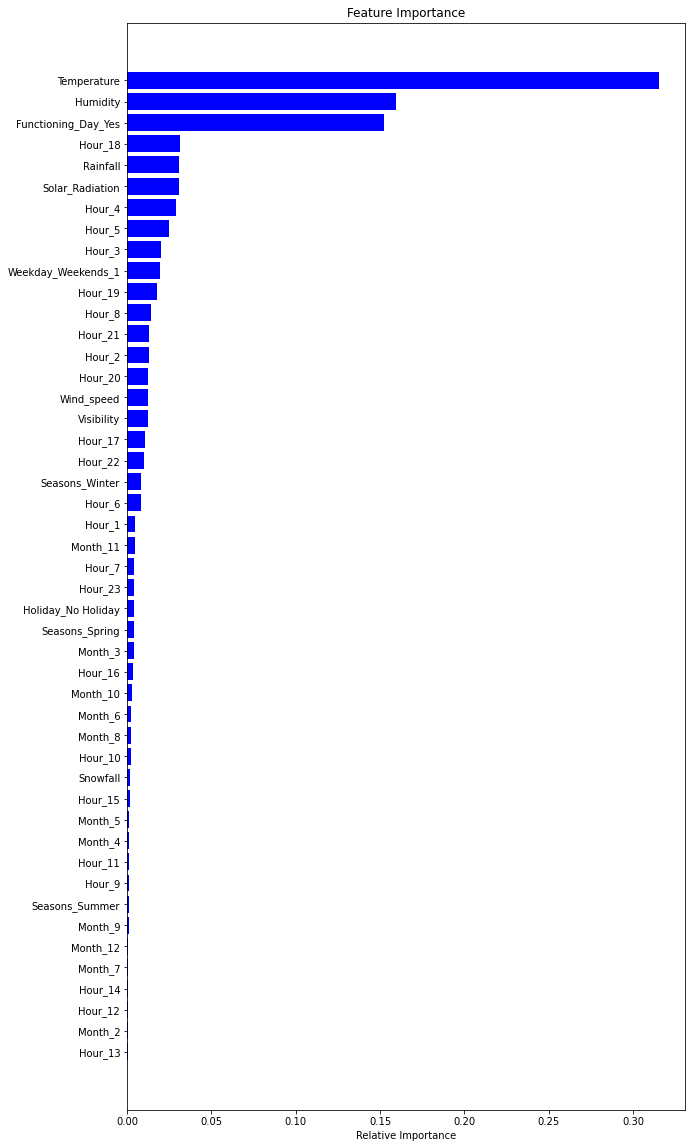

In [ ]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
random_forest = RandomForestRegressor()
params = {'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None], 
          'max_features': ['auto', 'sqrt'], 
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10],
          'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}
rf_regressor = RandomizedSearchCV(random_forest,params , scoring = 'neg_mean_squared_error' , cv = 5)
rf_regressor.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='neg_mean_squared_error')

In [ ]:
print("\nUsing ",rf_regressor.best_params_, "\n the negative mean squared error is: ", rf_regressor.best_score_)


Using  {'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80} 
 the negative mean squared error is:  -12.494802206100763


In [ ]:
y_pred_train_r1 = rf_regressor.predict(X_train)
y_pred_test_r2 = rf_regressor.predict(X_test)

In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r1)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r1)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r1)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r1))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 3.839402903112143
RMSE : 1.959439435938795
MAE : 1.2977856330124662
R2 : 0.9750673032091224
Adjusted R2 : 0.9745202272291171


**Looks like our r2 score value is 0.97 that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.**



In [ ]:
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r2)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r2)
print("MAE :",MAE_rf)

#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r2))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.872765822663624
RMSE : 3.5878636850727235
MAE : 2.2371049778023813
R2 : 0.9185094706844342
Adjusted R2 : 0.9167213965117771


**The r2_score for the test set is 0.91. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).**




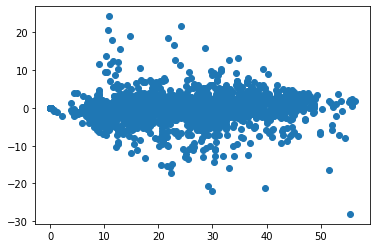

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_test_r2),(y_test)-(y_pred_test_r2))

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no improvement after doing hyperparameter tuning and cross validation.

#**CONCLUSION**

During the time of our analysis, we initially performed EDA on all of the features of dataset. We have analysed both numerical as well as categorical variables. For a good analysis we splitted the date column and added a new column as weekday_weekends. We also saw about the correlation and other relationships and found out that dew_point_temprature and temprature column are colinear and so we dropped the dew_point_temprature column. Also our output feature had some outliers value so we tried to fixed it by square rooting the values of output feature values. 

Next we implemented 6 machine learning algorithms Linear Regression,lasso,ridge,elasticnet,decission tree and Random Forest  We did hyperparameter tuning to improve our model performance. The results of our evaluation are:

In [ ]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  R2_score  \
Training set 0           Linear regression   4.474  35.078  5.923     0.772   
             1            Lasso regression   7.255  91.594  9.570     0.405   
             2            Ridge regression   4.474  35.078  5.923     0.772   
             3      Elastic net regression   5.792  57.574  7.588     0.626   
             4    Dicision tree regression   6.005  60.213  7.760     0.609   
             5    Random forest regression   0.810   1.600  1.265     0.990   
Test set     0           Linear regression   4.410  33.275  5.768     0.789   
             1            Lasso regression   7.456  96.775  9.837     0.387   
             2            Ridge regression   4.410  33.277  5.769     0.789   
             3  Elastic net regression Test  5.874  59.451  7.710     0.624   
             4    Dicision tree regression   6.458  70.213  8.379     0.556   
             5    Random forest regression   2.204  12.732  3.568     0.919   

                Adjusted R2  
Training set 0         0.77  
             1         0.39  
             2         0.77  
             3         0.62  
             4         0.60  
             5         0.99  
Test set     0         0.78  
             1         0.37  
             2         0.78  
             3         0.62  
             4         0.55  
             5         0.92

- No overfitting is seen.
- Random forest Regressor gridsearchcv gives the highest R2 score of 99% for Train Set and 92% for Test set.
- We can deploy this model.